In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv("perrin-freres-monthly-champagne.csv")
print("Data imported")

Data imported


In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


Row 105 and 106 contains unusable data which needs to be removed(dropped)

In [14]:
df = df.drop(105, axis = 0) # 0 = row
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
106,Perrin Freres monthly champagne sales millions...,NaN


In [15]:
df = df.drop(106, axis = 0)
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


Rename column names

In [16]:
df.columns = ['Month', 'Sales(million$)']
df.head()

,Month,Sales(million$)
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


For TSA, we need Month as our index col.

In [18]:
df['Month'] = pd.to_datetime(df['Month'])
#Converts month to DateTime format for use as index
df.head()

,Month,Sales(million$)
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [19]:
df.set_index('Month', inplace = True)
df.head()

,Sales(million$)
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<Figure size 1440x720 with 0 Axes>

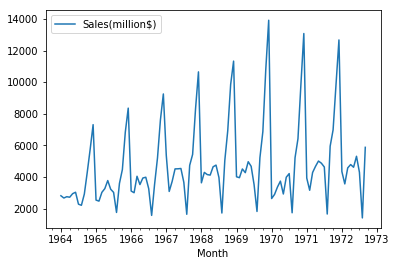

In [21]:
#Visualise data
plt.figure(figsize = (20,10))
df.plot()

#### Moving to prediction for next 24 months

In [25]:
model = sm.tsa.statespace.SARIMAX(df['Sales(million$)'], order =(1,0,0), seasonal_order = (1,1,1,12))
result=model.fit()                                 

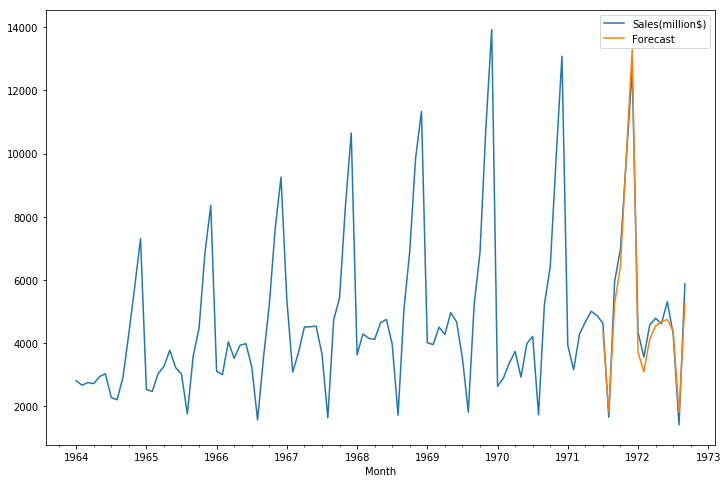

In [29]:
df['Forecast'] = result.predict(start = 90, end = 104, dynamic = True)
df[['Sales(million$)','Forecast']].plot(figsize = (12,8))

#### Forecasting future sales

In [30]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,24)]        

In [31]:
future_dates_df = pd.DataFrame(index = future_dates[1:], columns= df.columns)

In [32]:
future_dates_df.head()

,Sales(million$),Forecast
1972-10-01,NaN,NaN
1972-11-01,NaN,NaN
1972-12-01,NaN,NaN
1973-01-01,NaN,NaN
1973-02-01,NaN,NaN


In [33]:
future_df = pd.concat([df,future_dates_df], axis = 0)
future_df.tail()

,Sales(million$),Forecast
1974-04-01,NaN,NaN
1974-05-01,NaN,NaN
1974-06-01,NaN,NaN
1974-07-01,NaN,NaN
1974-08-01,NaN,NaN


In [34]:
future_df['Forecast'] = result.predict(start = 104, end  = 120, dynamic= True)
future_df.head()

,Sales(million$),Forecast
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN


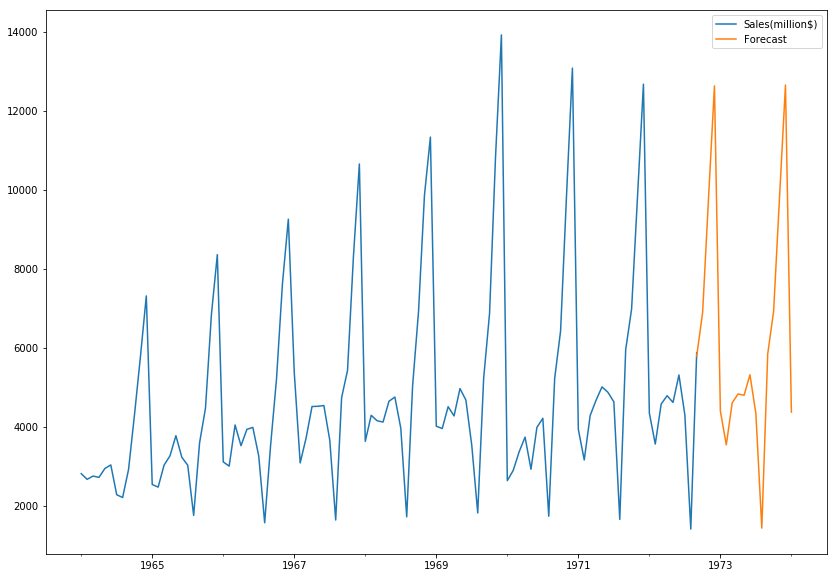

In [36]:
future_df[['Sales(million$)', 'Forecast']].plot(figsize = (14,10))